### Plot 1 in the paper "Chaos in Duopoly Pricing", T.PUU

###### Here the dynamics of two competing firms in a market is studied in terms of Cournot's duopoly theory. Assuming iso-elastic demand and constant unit production costs the iterative mapping.

\begin{equation}
x_{t} =\sqrt{\frac{y_{t-1}}{\alpha}}-y_{t-1}
\label{Ia}
\tag{4-T.PUU}
\end{equation}

\begin{equation}
y_{t} =\sqrt{\frac{x_{t-1}}{\beta}}-x_{t-1}
\label{Ib}
\tag{5-T.PUU}
\end{equation}

##### Now we are going to plot the figure 1 of T.PUU 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure 

In [ ]:
def logistic1(c1, q2):
    return ((q2/c1)**(1/2)-q2)

def logistic2(c1, q2):
    return ((q2/c1)**(1/2)-q2)

<Figure size 576x576 with 0 Axes>

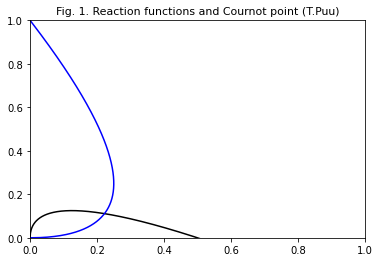

In [20]:
figure(num=None, figsize=(8, 8))
a=2
b=1
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 1,num=1000)
y = np.linspace(0, 1,num=1000)
ax.plot(x, logistic1(a, y), 'k')
ax.plot(logistic2(b, x),x,  'b')

plt.xlim(0,1)
plt.ylim(0,1)
plt.title("Fig. 1. Reaction functions and Cournot point (T.Puu)",fontsize = 11, loc='center')
plt.show()

#### Also we can do the same plot showed above, using a bool for

(0.0, 0.51)

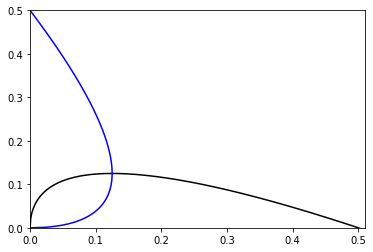

In [28]:

q2 = np.linspace(0, 1,num=1000)
q1 = []
c1 = 2

for i in q2:
    q1.append((i/c1)**(1/2)-i)


fig, ax = plt.subplots(1, 1)
ax.plot(q2, q1, 'k')
ax.plot(q1, q2, 'b')
plt.ylim(0,0.5)
plt.xlim(0.0,0.51)

In [21]:
#The dynamics of this system will be found capable of producing persistent movement, periodic and chaotic,
#along with Cournot equilibria. We anticipate the discussion a little by producing Fig. 2, which shows a
#chaotic adjustment process in the same setting as Fig. 1. The two-dimensional mapping (12)-(13) has,
#however, not been repeated in the usual way. According to tradition in the economics of duopoly it is
#assumed that the two competitors take turns every second period each in adjusting according to (12)-(13).
#We will later see what difference it makes to let the firms adjust simultaneously.


##### Now we are going to plot the figure 2 of T.PUU

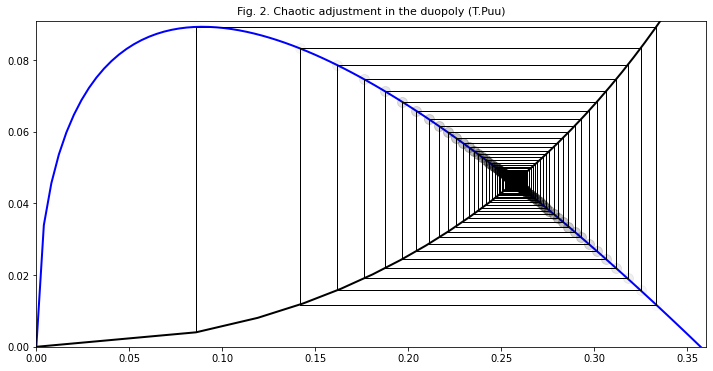

In [26]:
def plot_system(r1,r2, x0, n, ax=None):
    
    t = np.linspace(0.00, 0.4,100)
    ax.plot(t,logistic1(r1, t),  'b', lw=2)
    ax.plot(logistic2(r2, t), t, 'k', lw=2)

    
    x1 = t[1]
    for i in range(n):
        x = logistic2(r2,x1)
        y = logistic1(r1,x)
        
        # Plot the two lines.
        ax.plot([x, x], [x1, y], 'k', lw=1) 
        ax.plot([x, logistic2(r2,y)], [y,y ], 'k', lw=1)
        
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x1 =  y

    ax.set_xlim(0,0.36)
    ax.set_ylim(0,0.091)
    ax.set_title(f"$r={r1:.1f}, \, x_0={t[1]:.1f}$")


fig, (ax1) = plt.subplots(1, figsize=(12, 6),
                               sharey=True)
plot_system(2.8,0.5, .1, 100, ax=ax1)
plt.title("Fig. 2. Chaotic adjustment in the duopoly (T.Puu)",fontsize = 11, loc='center')
plt.show()


In [ ]:
def logistic1(c1, q2):
    return ((q2/c1)**(1/2)-q2)

##### Now we will make an application provided by a class composed of functions that graphs the bifurcations of a logistic function.

In [341]:
class secuenciaLogistica:
    """
    Model the dynamic system described in the form: x_{n+1} = f(r, x_n)
    """
    def __init__(self, fx):
        """
        Inicializa con x y r = 0 para una función fx arbitraria
        """
        self.x, self.r, self.fx = 0, 0, fx
    
    def actualizar(self):
        """
        Aplica el mapa de acuerdo a la función fx para obtener el siguiente termino de la iteración.
        Se asume que fx es una función de 2 argumentos: r y x.
        """
        self.x = self.fx(self.r, self.x)
    
    def generarSecuencia(self, n):
        "Genera y retorna una secuencia de longitud n para la función fx"
        xns=[]
        for i in range(n):
            xns.append(self.x)
            self.actualizar()
        return xns
    
    def diagBifurcacion(self, inicio, fin, paso, x0, n, ultimos, titulo='', aspecto=(10,7)):
        """
        Generates the bifurcation diagram of the function f(x) in the interval of r given by [start, end]
         with steps in r given by `step` using a sequence of `n` elements. Then take the
         `last` elements of the sequence to include them in the graph.
         Assigns a `title` to the graph if one is provided and uses an `aspect` aspect ratio if one is provided.
         I provide you.
        """
        import matplotlib.pyplot as plt
        self.r=inicio
        fig=plt.figure(figsize=aspecto)
        while self.r<fin:
            self.x=x0
            xns=self.generarSecuencia(n)
            self.r+=paso
            xfinales=xns[n-ultimos:]
            rs=[self.r for xs in xfinales]     
            plt.scatter(rs,xfinales, c='b', marker='o', s=0.1)
        plt.title(titulo, fontsize=24)
        plt.xlabel('$r$', fontsize=24)
        plt.ylabel('$x_n$\'s convergentes', fontsize=24)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        #plt.xlim(3.8,5)
        #plt.ylim(3.6,4.5)
        #plt.show()
        plt.savefig('diagramaBifurcacion.png')

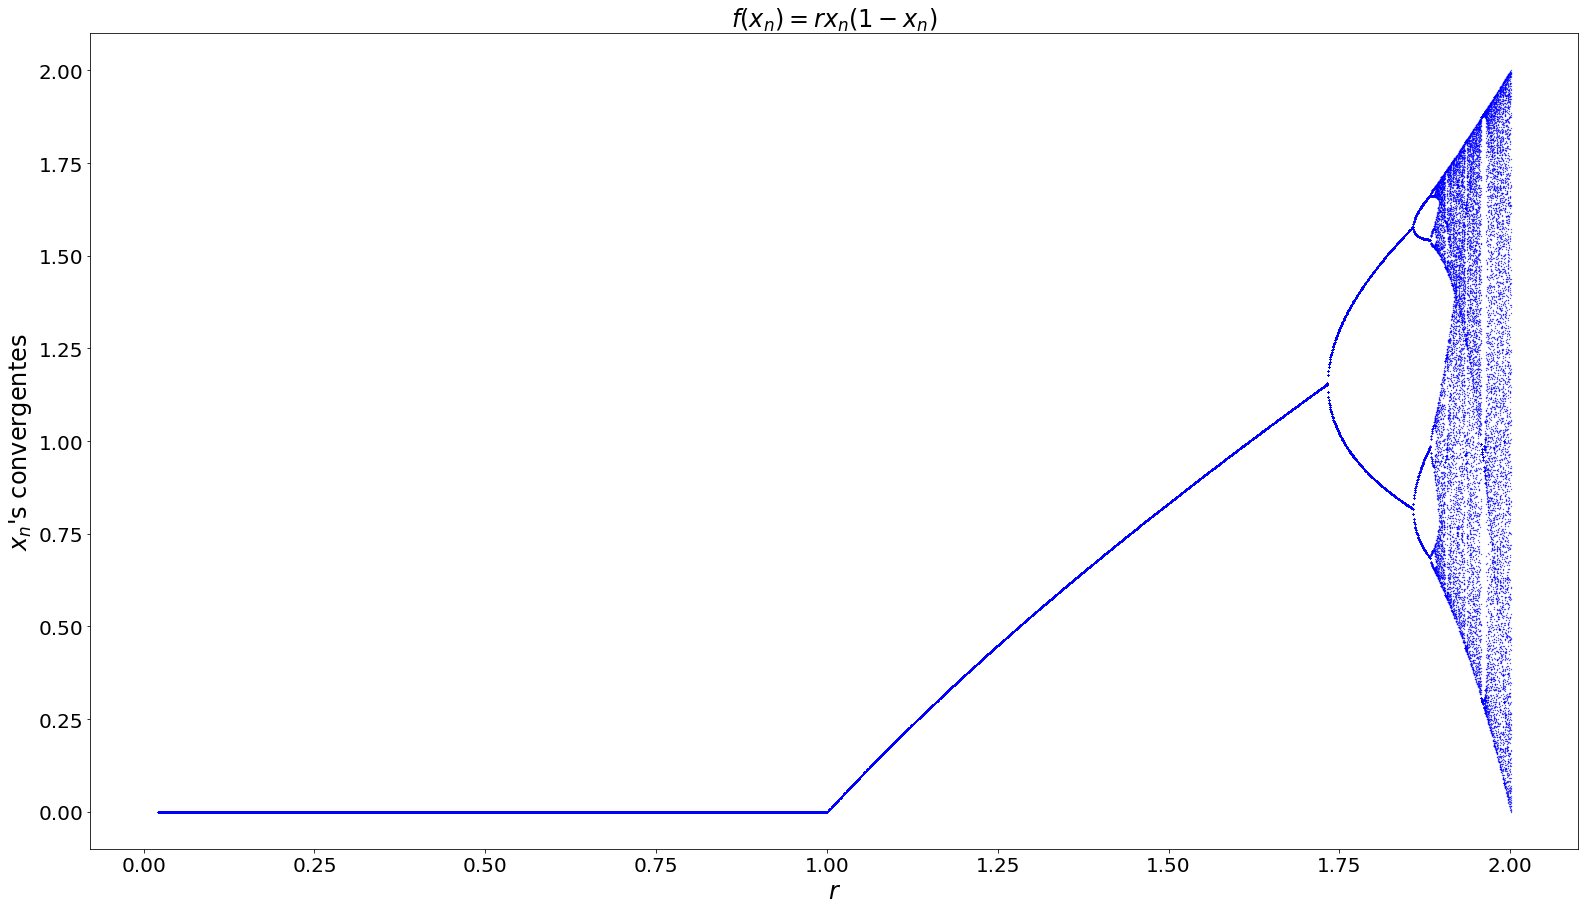

In [573]:
#Define una funcion empleando la aplicacion logistica
aplLogistica = lambda r, x: r*x*(r-x) 
#Inicializamos una instancia de la clase con la función fx deseada.
secOriginal=secuenciaLogistica(aplLogistica)   
secOriginal.diagBifurcacion(0.02,7,0.000625,0.5,3000,100,titulo='$f(x_n)=rx_n(1-x_n)$',aspecto=(26.67,15))

C:\Users\crbw7\AppData\Local\Temp/ipykernel_11992/134746396.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  x=(1/r)*x*(1-x)
C:\Users\crbw7\AppData\Local\Temp/ipykernel_11992/134746396.py:10: RuntimeWarning: overflow encountered in double_scalars
  x=(1/r)*x*(1-x)


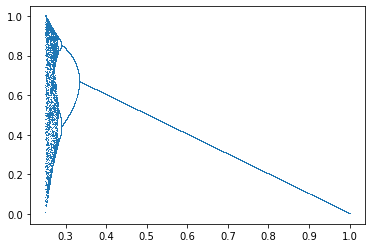

In [27]:
import matplotlib.pyplot as plt
import numpy as np
R=np.linspace(0.0,1.0,100000)
X=[]
Y=[]
for r in R:
    X.append(r)
    x=np.random.random()
    for n in range(1000):
        x=(1/r)*x*(1-x)
    Y.append(x)
plt.plot(X,Y,ls=' ', marker=',')
plt.show()
    

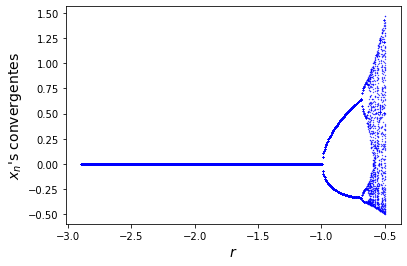

In [602]:
x0=-0.09  #Initial population
n=100000  #Total number of iterations
ultimos=50   #Terms that we will consider to check where the sequence converges.

r=-2.9
fig=plt.figure()
while r<0: 
    xns=[x0]   #List where the elements of the sequence are saved.
    for i in range(n):
        xns.append((1/r)*xns[i]*(1-xns[i]))
    r+=0.005
    xfinales=xns[n-ultimos:]    #The last 50 values of the sequence.
    rs=[r for xs in xfinales]    #A list with the current r value repeated 50 times.
    plt.scatter(rs, xfinales, c='b', marker='o', s=0.1)
    
plt.xlabel('$r$', fontsize=14)
plt.ylabel('$x_n$\'s convergentes', fontsize=14)
#plt.show()
plt.savefig('logisticaOriginal.png')

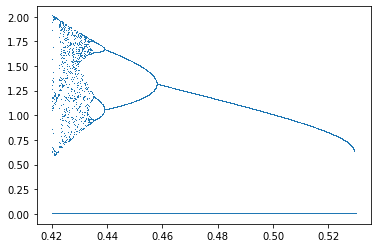

In [51]:
import matplotlib.pyplot as plt
import numpy as np
R=np.linspace(0.42,0.53,10000)
X=[]
Y=[]
for r in R:
    X.append(r)
    x=np.random.random()
    for n in range(1000):
        x=(x*(1/r)-x**2)**2
    Y.append(x)
plt.plot(X,Y,ls=' ', marker=',')
plt.show()

C:\Users\crbw7\AppData\Local\Temp/ipykernel_16692/3585598345.py:10: RuntimeWarning: overflow encountered in double_scalars
  x=(x*r-x**2)**2
C:\Users\crbw7\AppData\Local\Temp/ipykernel_16692/3585598345.py:10: RuntimeWarning: invalid value encountered in double_scalars
  x=(x*r-x**2)**2


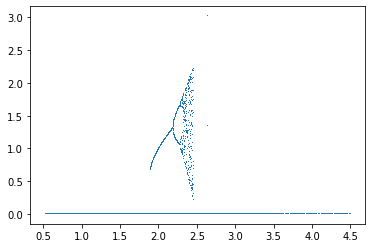

In [52]:
import matplotlib.pyplot as plt
import numpy as np
R=np.linspace(0.53,4.5,10000)
X=[]
Y=[]
for r in R:
    X.append(r)
    x=np.random.random()
    for n in range(1000):
        x=(x*r-x**2)**2
    Y.append(x)
plt.plot(X,Y,ls=' ', marker=',')
plt.show()

##### When you want to graph the bifurcations of two mutually related ones. The algorithm to obtain the branches simultaneously is:

###### This is an example of paper "Nonlinear dynamics in the Cournot duopoly game with heterogeneous players" H.N. Agiza*, A.A. Elsadany (2003) Fig. 1. Bifurcation diagram with respect to the parameter $\alpha$ speed of adjustment of bounded rational player, with other fixed parameters a =10; b = 0:5; c1 = 3; and c2 = 5:

\begin{equation}
q_{1}(t+1) =q_{1}(t) + \alpha q_{1}(t)(a-c_{1}-2bq_{1}(t)-bq_{2}(t))
\label{Ia}
\tag{11-H.N. Agiza}
\end{equation}

\begin{equation}
q_{2}(t+1) =\frac{1}{2b}(a-c_{2}-bq_{1})
\label{Ib}
\tag{12-H.N. Agiza}
\end{equation}

##### Now we are going to plot the figure 1 showed in H.N. Agiza (2003)

C:\Users\crbw7\AppData\Local\Temp/ipykernel_12152/535977251.py:6: RuntimeWarning: overflow encountered in double_scalars
  x_next = x+(r*x)*(a-c1-(2*b*x)- b* y)
C:\Users\crbw7\AppData\Local\Temp/ipykernel_12152/535977251.py:6: RuntimeWarning: invalid value encountered in double_scalars
  x_next = x+(r*x)*(a-c1-(2*b*x)- b* y)


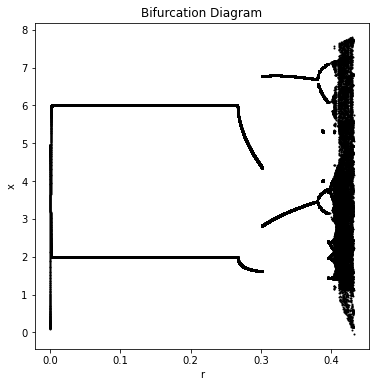

In [37]:
a=10
b=0.5
c1=3
c2=5
def system_equations(x, y, r):
    x_next = x+(r*x)*(a-c1-(2*b*x)- b* y)
    y_next = (1/(2*b))*(a-c2-b*x)
    return x_next, y_next

# Function to iterate the system
def iterate_system(x0, y0, r, num_iterations):
    x = np.zeros(num_iterations)
    y = np.zeros(num_iterations)
    x[0], y[0] = x0, y0
    for t in range(1, num_iterations):
        x[t], y[t] = system_equations(x[t-1], y[t-1], r)
    return x, y

# Parameters
r_values = np.linspace(0, 4, 1000000)  # Range of parameter values for 'r'
x0, y0 = 0.1, 0.1  # Initial conditions
num_iterations = 1000  # Number of iterations

# Iterate the system for each value of 'r'
bifurcation_data1 = []
bifurcation_data2 = []
for r in r_values:
    x_traj, y_traj = iterate_system(x0, y0, r, num_iterations)
    bifurcation_data1.append((r, x_traj[-1]))
    bifurcation_data2.append((r, y_traj[-1]))

# Plot bifurcation diagram
plt.figure(figsize=(6, 6))
plt.scatter(*zip(*bifurcation_data1), s=1, c='black', marker='o')
plt.scatter(*zip(*bifurcation_data2), s=1, c='black', marker='o')
plt.xlabel('r')
plt.ylabel('x')
plt.title('Bifurcation Diagram')
plt.show()

###### this is an example of how the algorithm above showed works to logistc function. 

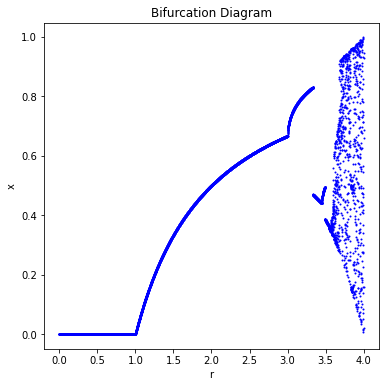

In [12]:
def system_equations(x, y, r):
    x_next = r*y*(1-y)
    y_next = r*x*(1-x)
    return x_next, y_next

# Function to iterate the system
def iterate_system(x0, y0, r, num_iterations):
    x = np.zeros(num_iterations)
    y = np.zeros(num_iterations)
    x[0], y[0] = x0, y0
    for t in range(1, num_iterations):
        x[t], y[t] = system_equations(x[t-1], y[t-1], r)
    return x, y

# Parameters
r_values = np.linspace(0, 4, 10000)  # Range of parameter values for 'r'
x0, y0 = 0.1, 0.1  # Initial conditions
num_iterations = 10000  # Number of iterations

# Iterate the system for each value of 'r'
bifurcation_data = []
for r in r_values:
    x_traj, y_traj = iterate_system(x0, y0, r, num_iterations)
    bifurcation_data.append((r, x_traj[-1]))

# Plot bifurcation diagram
plt.figure(figsize=(6, 6))
plt.scatter(*zip(*bifurcation_data), s=1, c='blue', marker='o')
plt.xlabel('r')
plt.ylabel('x')
plt.title('Bifurcation Diagram')
plt.show()